In [63]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [65]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [66]:
match1 = df2[((df2['team1'] == 'Delhi Daredevils') | (df2['team1'] == 'Delhi Capitals')) & (df2['team2'] == 'Royal Challengers Bangalore')]
match2 = df2[(df2['team1'] == 'Royal Challengers Bangalore') & ((df2['team2'] == 'Delhi Daredevils') | (df2['team2'] == 'Delhi Capitals'))]

Match1 = Delhi Home Ground

Match2 = Bangalore Home Ground

# Overall Delhi vs Bangalore:

In [67]:
match = pd.concat((match1,match2))
match.head()

id  season          city        date             team1  \
75    76    2008         Delhi  2008-04-30  Delhi Daredevils   
166  167    2009  Johannesburg  2009-05-19  Delhi Daredevils   
196  197    2010     Bangalore  2010-03-25  Delhi Daredevils   
208  209    2010         Delhi  2010-04-04  Delhi Daredevils   
262  263    2011         Delhi  2011-04-26  Delhi Daredevils   

                           team2                  toss_winner toss_decision  \
75   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
166  Royal Challengers Bangalore             Delhi Daredevils           bat   
196  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
208  Royal Challengers Bangalore             Delhi Daredevils           bat   
262  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

     result  dl_applied                       winner  win_by_runs  \
75   normal           0             Delhi Daredevils           10   
166  normal           0  Royal Challengers Bangalore            0   
196  normal           0             Delhi Daredevils           17   
208  normal           0             Delhi Daredevils           37   
262  normal           0  Royal Challengers Bangalore            0   

     win_by_wickets player_of_match                  venue     umpire1  \
75                0      GD McGrath       Feroz Shah Kotla   Aleem Dar   
166               7       JH Kallis  New Wanderers Stadium   IL Howell   
196               0       KM Jadhav  M Chinnaswamy Stadium  BG Jerling   
208               0  PD Collingwood       Feroz Shah Kotla   BF Bowden   
262               3         V Kohli       Feroz Shah Kotla    S Asnani   

         umpire2 umpire3  
75     I Shivram     NaN  
166    RB Tiffin     NaN  
196  RE Koertzen     NaN  
208    M Erasmus     NaN  
262    RJ Tucker     NaN

Matches played between Delhi and Bangalore.

In [68]:
match.shape

(23, 18)

In [69]:
match['winner'].value_counts()

Royal Challengers Bangalore    14
Delhi Daredevils                6
Delhi Capitals                  2
Name: winner, dtype: int64

In [70]:
match['winner'].value_counts().plot.bar()
plt.show()

**Bangalore won 14 times and Delhi won 8 times against each other.**

In [71]:
match['toss_winner'].value_counts()

Royal Challengers Bangalore    13
Delhi Daredevils                8
Delhi Capitals                  2
Name: toss_winner, dtype: int64

In [72]:
match['toss_decision'].value_counts()

field    17
bat       6
Name: toss_decision, dtype: int64

In [73]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Royal Challengers Bangalore    9
Delhi Daredevils               3
Delhi Capitals                 2
Name: winner, dtype: int64

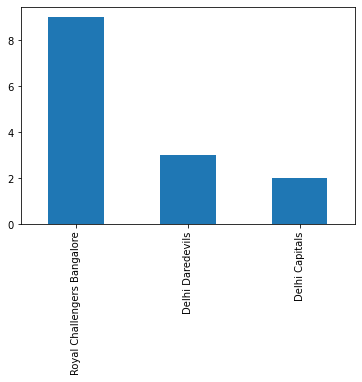

In [74]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

**Bangalore won the toss and won the match 9 times whereas Delhi won 5 times. So winning toss has affect to winning the match.**

In [75]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning                 batting_team      bowling_team  over  \
960         5       1  Royal Challengers Bangalore  Delhi Daredevils     1   
961         5       1  Royal Challengers Bangalore  Delhi Daredevils     1   
962         5       1  Royal Challengers Bangalore  Delhi Daredevils     1   
963         5       1  Royal Challengers Bangalore  Delhi Daredevils     1   
964         5       1  Royal Challengers Bangalore  Delhi Daredevils     1   

     ball    batsman non_striker  bowler  is_super_over  ...  bye_runs  \
960     1   CH Gayle   SR Watson  Z Khan              0  ...         0   
961     2  SR Watson    CH Gayle  Z Khan              0  ...         0   
962     3  SR Watson    CH Gayle  Z Khan              0  ...         0   
963     4  SR Watson    CH Gayle  Z Khan              0  ...         0   
964     5  SR Watson    CH Gayle  Z Khan              0  ...         0   

     legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
960            0            0             0             1           0   
961            0            0             0             4           0   
962            0            0             0             0           0   
963            0            0             0             4           0   
964            0            0             0             0           0   

     total_runs  player_dismissed dismissal_kind fielder  
960           1               NaN            NaN     NaN  
961           4               NaN            NaN     NaN  
962           0               NaN            NaN     NaN  
963           4               NaN            NaN     NaN  
964           0               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Delhi and Bangalore.

In [76]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many batsmen from both teams will have strike rate more than 130 and hit more than 3 boundaries of which, at least two boundaries should be 4s:

In [77]:
strike_rate_dict = {}
for j in ids:
    batsman = list(delivery[delivery['match_id'] == j]['batsman'].unique())
    counter = 0
    for k in batsman:
        batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == k)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        fours = 0
        sixes = 0
        strike_rate = 0
        for i in batsman_runs:
            if i == 4 or i == 5:
                fours += 1
            elif i == 6 or i == 7:
                sixes += 1
        total_balls = len(batsman_runs)
        if total_balls > 10:
            strike_rate = np.round((total_run/total_balls)*100,2)
        else:
            strike_rate = 0
        if strike_rate > 130 and (fours+sixes)>3 and fours>=2:
            counter += 1
    strike_rate_dict[j] = counter
strike_rate_dict

{76: 5,
 167: 1,
 197: 4,
 209: 3,
 263: 2,
 401: 2,
 459: 2,
 543: 2,
 571: 2,
 632: 1,
 7912: 3,
 7938: 4,
 11337: 4,
 5: 2,
 55: 1,
 104: 2,
 129: 2,
 312: 2,
 372: 4,
 438: 4,
 495: 3,
 587: 4,
 11311: 3}

These are the number of batsmen match wise who had strike rate greater than 125, hit more than 3 boundaries, atleast two of them are fours and played more than 10 balls.

In [78]:
np.mean(list(strike_rate_dict.values()))

2.6956521739130435

So ~3 batsmen in an average satisfied the conditions given per match.

In [79]:
strike_rate_dict = {}
batsman = ['V Kohli', 'AB de Villiers', 'PA Patel', 'M Ali', 'S Dube', 'Gurkeerat Singh', 'Washington Sundar', 'RR Pant', 'SS Iyer', 'S Dhawan', 'P Shaw', 'AR Patel']
for j in batsman:
    counter = 0
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        fours = 0
        sixes = 0
        strike_rate = 0
        for i in batsman_runs:
            if i == 4 or i == 5:
                fours += 1
            elif i == 6 or i == 7:
                sixes += 1
        total_balls = len(batsman_runs)
        if total_balls > 10:
            strike_rate = np.round((total_run/total_balls)*100,2)
        else:
            strike_rate = 0
        if strike_rate > 130 and (fours+sixes)>3 and fours>=2:
            counter += 1
    strike_rate_dict[j] = counter
strike_rate_dict

{'V Kohli': 7,
 'AB de Villiers': 7,
 'PA Patel': 1,
 'M Ali': 0,
 'S Dube': 0,
 'Gurkeerat Singh': 0,
 'Washington Sundar': 0,
 'RR Pant': 4,
 'SS Iyer': 3,
 'S Dhawan': 2,
 'P Shaw': 1,
 'AR Patel': 0}

These are the current RCB and DC batsmen who satisfied the condition number of times in RCB vs DC match earlier.

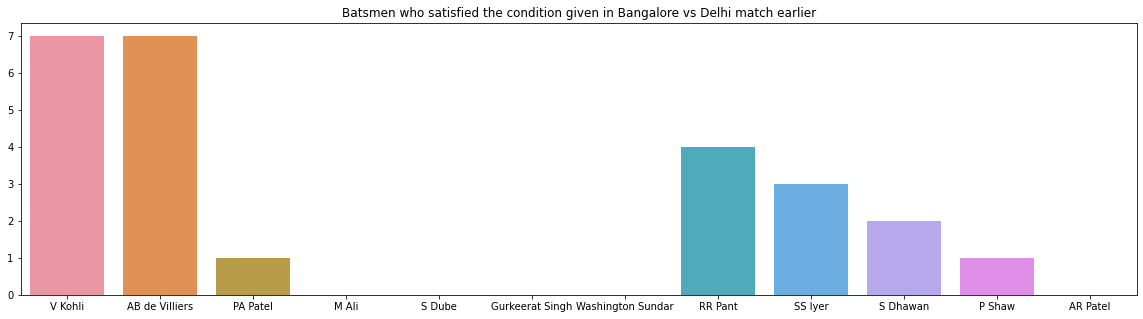

In [80]:
strike_rate = pd.Series(list(strike_rate_dict.values()),index = list(strike_rate_dict.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = strike_rate.index, y = strike_rate,ax=ax)
plt.title('Batsmen who satisfied the condition given in Bangalore vs Delhi match earlier')
plt.show()

**So Kohli and AB de Villiers most of the time satisfied the conditions given among current Bangalore and Delhi batsmen in DC vs RCB match till now.**

In [81]:
strike_rate_dict_overall = {}
batsman_overall = ['V Kohli', 'AB de Villiers', 'PA Patel', 'M Ali', 'S Dube', 'Gurkeerat Singh', 'Washington Sundar', 'AJ Finch', 'RR Pant', 'SS Iyer', 'S Dhawan', 'P Shaw', 'AR Patel', 'AM Rahane', 'S Hetmyer', 'MP Stoinis']
total_ids = list(df1[df1['batsman'].isin(batsman_overall)]['match_id'].unique())
for j in batsman_overall:
    counter = 0
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        fours = 0
        sixes = 0
        strike_rate = 0
        for i in batsman_runs:
            if i == 4 or i == 5:
                fours += 1
            elif i == 6 or i == 7:
                sixes += 1
        total_balls = len(batsman_runs)
        if total_balls > 10:
            strike_rate = np.round((total_run/total_balls)*100,2)
        else:
            strike_rate = 0
        if strike_rate > 130 and (fours+sixes)>3 and fours>=2:
            counter += 1
    strike_rate_dict_overall[j] = counter
strike_rate_dict_overall

{'V Kohli': 42,
 'AB de Villiers': 46,
 'PA Patel': 30,
 'M Ali': 3,
 'S Dube': 0,
 'Gurkeerat Singh': 6,
 'Washington Sundar': 0,
 'AJ Finch': 15,
 'RR Pant': 24,
 'SS Iyer': 16,
 'S Dhawan': 35,
 'P Shaw': 7,
 'AR Patel': 3,
 'AM Rahane': 24,
 'S Hetmyer': 1,
 'MP Stoinis': 7}

These are the current RCB and DC batsmen who satisfied the condition number of times in IPl till now.

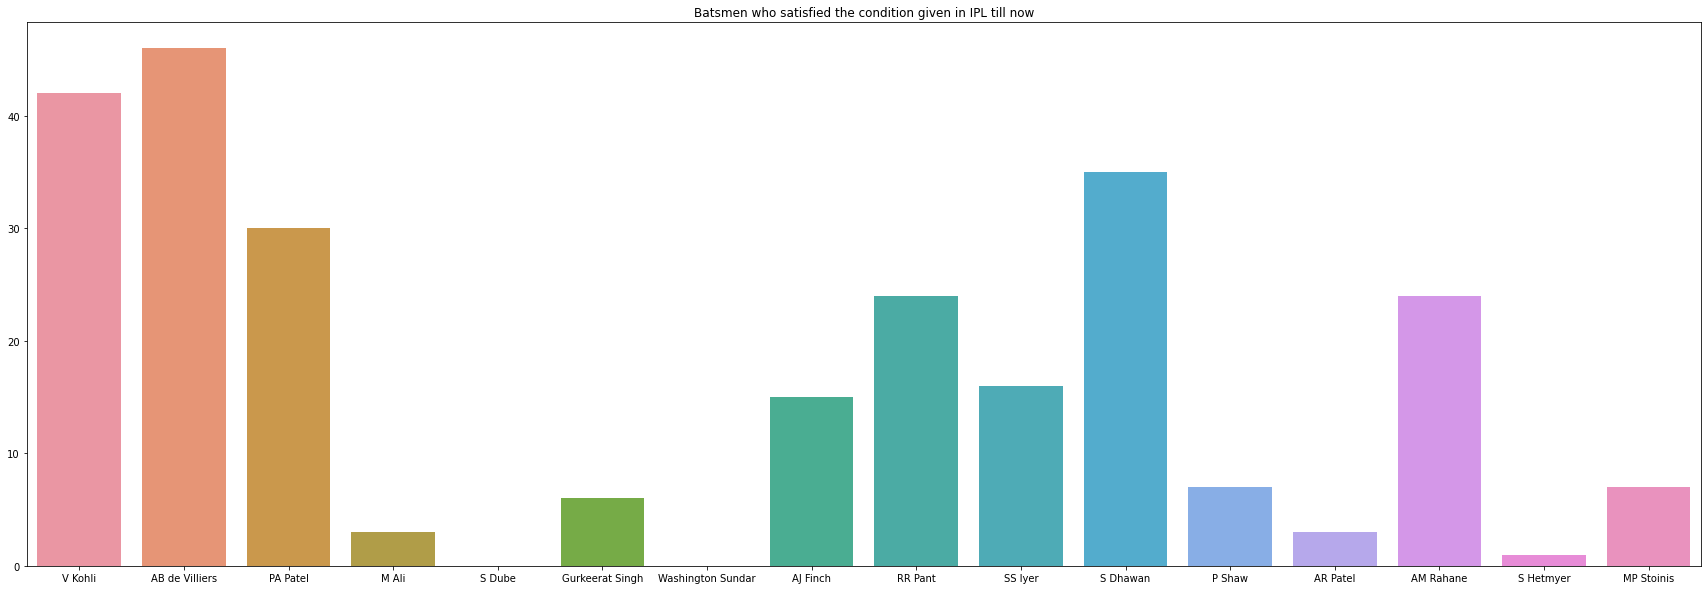

In [82]:
strike_rate_overall = pd.Series(list(strike_rate_dict_overall.values()),index = list(strike_rate_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x = strike_rate_overall.index, y = strike_rate_overall,ax=ax)
plt.title('Batsmen who satisfied the condition given in IPL till now')
plt.show()

**So AB de Villiers most of the time satisfied the conditions given followed by Kohli and Dhawan among current Bangalore and Delhi batsmen in overall IPL till now.**

## How many balls will Kagiso Rabada take to get his first wicket:

In [83]:
ball_list = []
ids1 = delivery[delivery['bowler']=='K Rabada']['match_id'].unique()
for j in ids1:
    dismissal_kind = list(delivery[(delivery['match_id']==j) & (delivery['bowler'] == 'K Rabada')]['dismissal_kind'])
    wide_runs = list(delivery[(delivery['match_id']==j) & (delivery['bowler'] == 'K Rabada')]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id']==j) & (delivery['bowler'] == 'K Rabada')]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list.append(ball)
ball_list

[5, 11]

Kagiso Rabada took wickets in 2 matches against Bangalore and took 5 and 11 balls to get his first wicket.

In [84]:
ball_list_overall = []
ids2 = df1[df1['bowler']=='K Rabada']['match_id'].unique()
for j in ids2:
    dismissal_kind = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'K Rabada')]['dismissal_kind'])
    wide_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'K Rabada')]['wide_runs'])
    noball_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'K Rabada')]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list_overall.append(ball)
print(ball_list_overall)

[10, 2, 11, 23, 1, 14, 13, 19, 10, 15, 12, 5, 10, 14, 13, 5, 20, 11]


Kagiso Rabada took these many balls to take his first wicket in overall IPL.

In [85]:
avg_ball_overall= np.mean(ball_list_overall)
avg_ball_overall

11.555555555555555

Kagiso Rabada took ~12 balls in an average to take his first wicket in overall IPL.

In [86]:
ball_list_overall_bowling_first = []
for j in ids2:
    dismissal_kind = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'K Rabada') & (df1['inning'] == 1)]['dismissal_kind'])
    wide_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'K Rabada') & (df1['inning'] == 1)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'K Rabada') & (df1['inning'] == 1)]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list_overall_bowling_first.append(ball)
print(ball_list_overall_bowling_first)

[10, 23, 1, 14, 10, 15, 5, 10, 13, 5, 20]


Kagiso Rabada took these many balls to take his first wicket in overall IPL while bowling in first inning.

In [87]:
avg_ball_overall_bowling_first = np.mean(ball_list_overall_bowling_first)
avg_ball_overall_bowling_first

11.454545454545455

Kagiso Rabada took 11 balls in an average to take his first wicket in overall IPL while bowling in first inning.

In [88]:
ball_list_overall_bowling_second = []
for j in ids2:
    dismissal_kind = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'K Rabada') & (df1['inning'] == 2)]['dismissal_kind'])
    wide_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'K Rabada') & (df1['inning'] == 2)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id']==j) & (df1['bowler'] == 'K Rabada') & (df1['inning'] == 2)]['noball_runs'])
    counter = 0
    for i in dismissal_kind:
        counter += 1
        if i in (['caught','bowled','lbw','caught and bowled','stumped']):
            break
    ball = 0
    for i in range(0,counter):
        if noball_runs[i] != 0:
            ball -= 1
        elif wide_runs[i] != 0:
            ball -= 1
        else:
            ball += 1
    if ball > 0:
        ball_list_overall_bowling_second.append(ball)
print(ball_list_overall_bowling_second)

[2, 11, 13, 19, 12, 14, 11]


Kagiso Rabada took these many balls to take his first wicket in overall IPL while bowling in second inning.

In [89]:
avg_ball_overall_bowling_second = np.mean(ball_list_overall_bowling_second)
avg_ball_overall_bowling_second

11.714285714285714

Kagiso Rabada took ~12 balls in an average to take his first wicket in overall IPL while bowling in second inning.

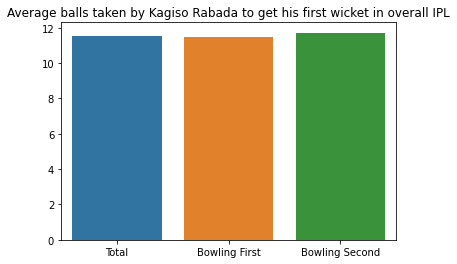

In [90]:
average_balls = pd.Series([avg_ball_overall,avg_ball_overall_bowling_first,avg_ball_overall_bowling_second],index = ['Total','Bowling First','Bowling Second'])
sns.barplot(x = average_balls.index , y = average_balls)
plt.title('Average balls taken by Kagiso Rabada to get his first wicket in overall IPL')
plt.show()

**Kagiso Rabada took more or less 12 balls to take his first wicket in overall IPL.**

## How many bowlers in the match will have an economy rate less than 8, bowl more than 8 dot balls and give away less than 4 boundaries:

In [91]:
economy_dict = {}
for j in ids:
    bowlers = list(delivery[delivery['match_id'] == j]['bowler'].unique())
    counter = 0
    for k in bowlers:
        runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['total_runs'])
        batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['batsman_runs'])
        bye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['bye_runs'])
        legbye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['legbye_runs'])
        wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['wide_runs'])
        noball_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['noball_runs'])
        s = 0
        bye = 0
        legbye = 0
        noball = 0
        wideball = 0
        dot_balls = 0
        boundary_count = 0
        for i in range(0,len(runs)):
            if (batsman_runs[i] == 0) & (wide_runs[i] == 0) & (noball_runs[i] == 0):
                dot_balls += 1
            if batsman_runs[i] >= 4:
                boundary_count += 1
            s += runs[i]
            bye += bye_runs[i]
            legbye += legbye_runs[i]
            if noball_runs[i] > 0:
                noball += 1
            if wide_runs[i] > 0:
                wideball += 1
        total_balls = len(runs) - noball - wideball
        total_runs = s - bye - legbye
        if total_balls > 6:
            economy_rate = (total_runs/total_balls)*6
        else:
            economy_rate = 0
        if economy_rate < 8 and boundary_count < 4 and dot_balls > 8:
            counter += 1
    economy_dict[j] = counter
economy_dict

{76: 1,
 167: 3,
 197: 0,
 209: 1,
 263: 4,
 401: 4,
 459: 3,
 543: 3,
 571: 0,
 632: 1,
 7912: 0,
 7938: 2,
 11337: 0,
 5: 3,
 55: 3,
 104: 4,
 129: 2,
 312: 3,
 372: 0,
 438: 2,
 495: 3,
 587: 1,
 11311: 4}

These are the number of bowlers match wise who had economy rate less than 8, bowled more than 8 dot balls, gave away less than 4 boundaries and bowled more than 1 over.

In [92]:
np.mean(list(economy_dict.values()))

2.0434782608695654

**So 2 bowlers in an average satisfied the conditions given per match.**

In [93]:
bowlers = ['YS Chahal', 'P Negi', 'DW Steyn', 'UT Yadav', 'Mohammed Siraj', 'Washington Sundar', 'M Ali', 'N Saini', 'S Dube', 'HV Patel', 'S Lamichhane', 'K Rabada', 'AR Patel']
economy_dict = {}
for j in bowlers:
    counter = 0
    for k in ids:
        runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['total_runs'])
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['batsman_runs'])
        bye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['bye_runs'])
        legbye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['legbye_runs'])
        wide_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['wide_runs'])
        noball_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['noball_runs'])
        s = 0
        bye = 0
        legbye = 0
        noball = 0
        wideball = 0
        dot_balls = 0
        boundary_count = 0
        for i in range(0,len(runs)):
            if (batsman_runs[i] == 0) & (wide_runs[i] == 0) & (noball_runs[i] == 0):
                dot_balls += 1
            if batsman_runs[i] >= 4:
                boundary_count += 1
            s += runs[i]
            bye += bye_runs[i]
            legbye += legbye_runs[i]
            if noball_runs[i] > 0:
                noball += 1
            if wide_runs[i] > 0:
                wideball += 1
        total_balls = len(runs) - noball - wideball
        total_runs = s - bye - legbye
        if total_balls > 6:
            economy_rate = (total_runs/total_balls)*6
        else:
            economy_rate = 0
        if economy_rate < 8 and boundary_count < 4 and dot_balls > 8:
            counter += 1
    economy_dict[j] = counter
economy_dict

{'YS Chahal': 3,
 'P Negi': 0,
 'DW Steyn': 1,
 'UT Yadav': 1,
 'Mohammed Siraj': 0,
 'Washington Sundar': 0,
 'M Ali': 2,
 'N Saini': 1,
 'S Dube': 0,
 'HV Patel': 0,
 'S Lamichhane': 0,
 'K Rabada': 1,
 'AR Patel': 0}

These are the current Bangalore and Delhi bowlers who had economy rate less than 8, bowled more than 8 dot balls and gave away less than 4 boundaries these many times in Bangalore vs Delhi match till now.

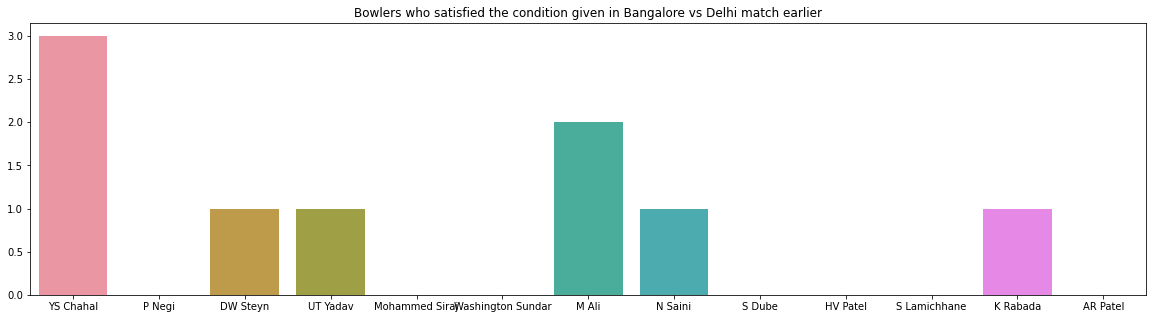

In [94]:
economy_rate = pd.Series(list(economy_dict.values()),index = list(economy_dict.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = economy_rate.index, y = economy_rate,ax=ax)
plt.title('Bowlers who satisfied the condition given in Bangalore vs Delhi match earlier')
plt.show()

**Chahal had economy rate less than 8, bowled more than 8 dot balls and gave away less than 4 boundaries 3 times which is highest followed by M Ali among current Bangalore and Delhi bowlers in Bangalore vs Delhi match earlier.**

In [95]:
bowlers_overall = ['YS Chahal', 'P Negi', 'DW Steyn', 'UT Yadav', 'Washington Sundar', 'M Ali', 'N Saini', 'Mohammed Siraj', 'S Dube', 'CH Morris', 'A Zampa', 'HV Patel', 'S Lamichhane', 'K Rabada', 'AR Patel', 'K Paul', 'MP Stoinis', 'Avesh Khan', 'R Ashwin']
total_ids = list(df1[df1['bowler'].isin(bowlers_overall)]['match_id'].unique())
economy_dict_overall = {}
for j in bowlers_overall:
    counter = 0
    for k in total_ids:
        runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['total_runs'])
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['batsman_runs'])
        bye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['bye_runs'])
        legbye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['legbye_runs'])
        wide_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['wide_runs'])
        noball_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['noball_runs'])
        s = 0
        bye = 0
        legbye = 0
        noball = 0
        wideball = 0
        dot_balls = 0
        boundary_count = 0
        for i in range(0,len(runs)):
            if (batsman_runs[i] == 0) & (wide_runs[i] == 0) & (noball_runs[i] == 0):
                dot_balls += 1
            if batsman_runs[i] >= 4:
                boundary_count += 1
            s += runs[i]
            bye += bye_runs[i]
            legbye += legbye_runs[i]
            if noball_runs[i] > 0:
                noball += 1
            if wide_runs[i] > 0:
                wideball += 1
        total_balls = len(runs) - noball - wideball
        total_runs = s - bye - legbye
        if total_balls > 6:
            economy_rate = (total_runs/total_balls)*6
        else:
            economy_rate = 0
        if economy_rate < 8 and boundary_count < 4 and dot_balls > 8:
            counter += 1
    economy_dict_overall[j] = counter
economy_dict_overall

{'YS Chahal': 13,
 'P Negi': 5,
 'DW Steyn': 18,
 'UT Yadav': 12,
 'Washington Sundar': 2,
 'M Ali': 5,
 'N Saini': 4,
 'Mohammed Siraj': 3,
 'S Dube': 0,
 'CH Morris': 11,
 'A Zampa': 2,
 'HV Patel': 3,
 'S Lamichhane': 1,
 'K Rabada': 6,
 'AR Patel': 16,
 'K Paul': 1,
 'MP Stoinis': 1,
 'Avesh Khan': 1,
 'R Ashwin': 24}

These are the current Bangalore and Delhi bowlers who had economy rate less than 8, bowled more than 8 dot balls and gave away less than 4 boundaries these many times in overall IPL till now..

In [96]:
economy_rate_overall = pd.Series(list(economy_dict_overall.values()),index = list(economy_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x = economy_rate_overall.index, y = economy_rate_overall,ax=ax)
plt.title('Bowlers who satisfied the condition given in overall IPL till now.')
plt.show()

**R Ashwin had economy rate less than 8, bowled more than 8 dot balls and gave away less than 4 boundaries 24 times which is highest followed by DM Steyn among current Bangalore and Delhi bowlers in overall IPL till now.**